In [58]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv("spam.csv")

In [60]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
df.shape

(5572, 2)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [63]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [64]:
df['Category'].replace({'ham':0, 'spam':1}, inplace=True)

In [65]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [67]:
a = 12

In [68]:
type(a)

int

In [69]:
str(a)

'12'

In [70]:
df['Message'] = [str(x)for x in df['Message']]          #(list cophersion)

In [71]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x = df['Message']
y = df['Category']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [75]:
X_train.shape

(4457,)

In [76]:
X_test.shape

(1115,)

In [77]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
vectorizer = CountVectorizer()

In [80]:
x_train_vect = vectorizer.fit_transform(X_train)

In [81]:
x_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
x_train_vect.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
X_train.shape

(4457,)

In [84]:
x_train_vect.toarray().shape

(4457, 7701)

In [85]:
y_train.head()

1978    1
3989    0
3935    0
4078    0
4086    1
Name: Category, dtype: int64

In [86]:
from sklearn.naive_bayes import BernoulliNB

In [87]:
model = BernoulliNB()

In [88]:
model.fit(x_train_vect, y_train)

BernoulliNB()

In [89]:
X_test_vect = vectorizer.transform(X_test)

In [90]:
X_test_vect.toarray().shape

(1115, 7701)

In [93]:
x_train_vect.shape

(4457, 7701)

In [94]:
model.score(X_test_vect, y_test)

0.9802690582959641

In [98]:
emails = ['XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIALE ZOUK WITH NICHOLS FROM PARIS.FREE ROSES 2 ALL LADIES !!! info: 07946746291/07880867867',
          'Oh that was a forwarded message. I thought you send that to me',
          'Dear Voucher Holder, 2 claim this weeks offer, at your PC go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply.2 stop texts txt STOP to 80062'
]

In [100]:
emails_vect = vectorizer.transform(emails)

In [101]:
emails_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [102]:
model.predict(emails_vect)

array([1, 0, 1], dtype=int64)

In [104]:
from sklearn.naive_bayes import MultinomialNB

In [105]:
mnb = MultinomialNB()

In [106]:
mnb.fit(x_train_vect, y_train)
mnb.score(X_test_vect, y_test)

0.9919282511210762

In [107]:
mnb.predict(emails_vect)

array([1, 0, 1], dtype=int64)

In [108]:
from sklearn.pipeline import Pipeline

In [112]:
clf = Pipeline([('vectorizer', CountVectorizer()),('mnb', MultinomialNB())])

In [113]:
clf

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [114]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [115]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [116]:
clf.score(X_test, y_test)

0.9919282511210762

In [117]:
clf.predict(emails)

array([1, 0, 1], dtype=int64)

In [118]:
y_pred = clf.predict(X_test)

In [119]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
cm = confusion_matrix(y_test, y_pred)

In [125]:
import seaborn as sns

<Axes: >

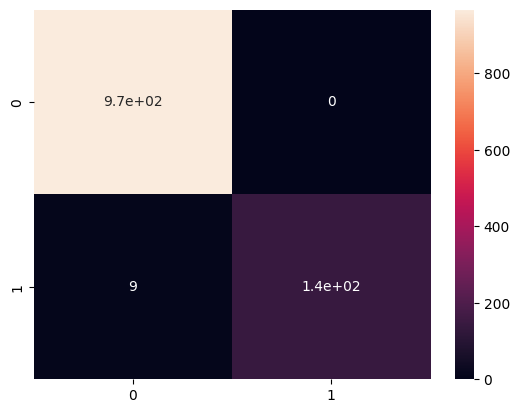

In [126]:
sns.heatmap(cm, annot=True)